Accelerometer Matrix Profile Example
====

In [1]:
# Read in accelerometer and meal time data from one user
import pathlib

from ema import read, parse

device_id = "6012582"
recording_id = "0000291121"
participant_id = "20029"

# Check IDs are the right length
assert len(str(device_id)) == 7
assert len(str(recording_id)) == 10

# TODO Check that the participant agreed to take part in the study
# Do this by opening "Z:\SEACO data\SEACO-CH20 qnaire data\SEACO_CH20_17082022_de_id.csv"
# as a dataframe, finding the row with participant_id = df["residents_id"] and checking
# that the value of "respondent_status" here == 1
# I've checked the one above by hand and it's fine
...

filename = f"{device_id}_{recording_id}-{participant_id}.cwa"
filepath = pathlib.Path(rf"data/{filename}")

# TODO add some code to look for the right file in all the "Week X" folders

assert filepath.exists()

meal_df = read.meal_info(participant_id)
allowed_meal_types = {"Snack", "Drink", "Meal", "No food/drink"}
meal_df = parse.extract_meals(meal_df, allowed_meal_types, verbose=True)

accel_df = read.accel_info(str(filepath))

Discarding: {'Catch-up end': 1, 'Catch-up start': 1, 'No catch-up': 2, 'No response': 72}
Kept: {'Drink': 35, 'Meal': 37, 'No food/drink': 4, 'Snack': 2}


In [2]:
# Slice the time series to only keep data near a meal event
import pandas as pd
from importlib import reload

reload(parse)

meal_times = parse.get_meal_datetime(meal_df["date"], meal_df["timestamp"])
accel_times = accel_df["time"]
start_times = meal_times - pd.Timedelta(1, "hour")

near_meal = parse.keep_nearby(accel_times, start_times, meal_times)


100%|██████████| 78/78 [00:22<00:00,  3.49it/s]


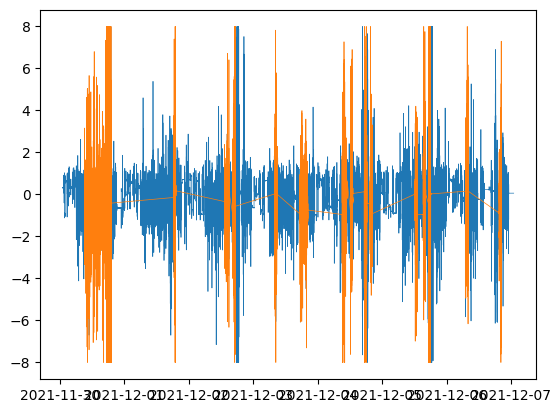

In [3]:
# Build the matrix profile for these events
import matplotlib.pyplot as plt

plt.plot(accel_times[::50], accel_df["accel_x"][::50], linewidth=0.5)
plt.plot(accel_times[near_meal], accel_df["accel_x"][near_meal], linewidth=0.5)